# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

#### Importar a Base de dados

In [23]:
import pandas as pd

tabela = pd.read_csv('advertising.csv')
display(tabela)


,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [24]:
display(tabela.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


None

#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

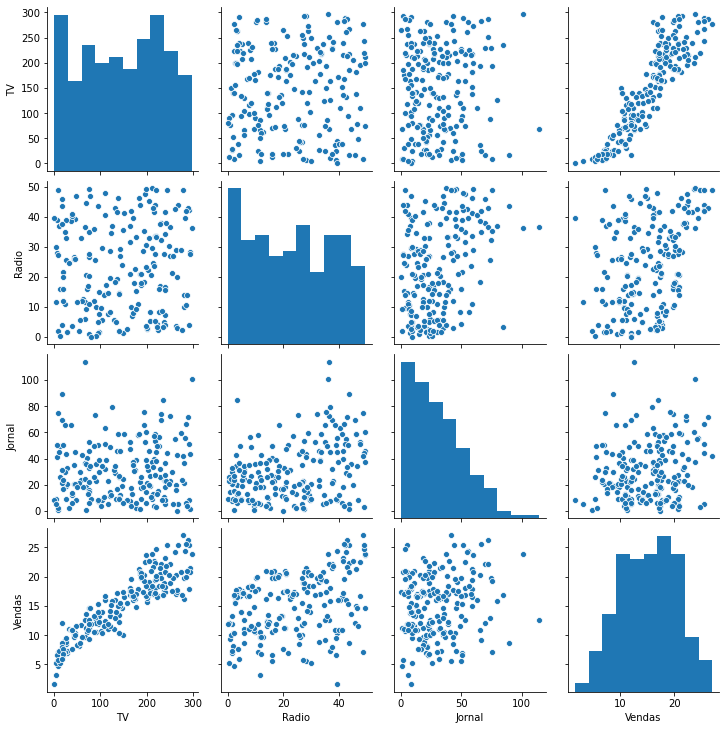

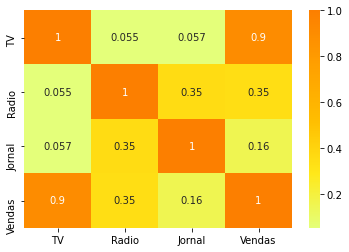

In [25]:
import seaborn  as sns
import matplotlib.pyplot as plt

sns.pairplot(tabela)
plt.show()

sns.heatmap(tabela.corr(), cmap='Wistia', annot=True)
plt.show()

#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [ ]:
from sklearn.model_selection import train_test_split

x = tabela.drop('Vendas', axis=1)
y = tabela['Vendas']

x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size=0.3, random_state=1)

#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# criar a inteligência articial
linear = LinearRegression()
randomforest = RandomForestRegressor()

# treinar a inteligência artificial
linear.fit(x_treino, y_treino)
randomforest.fit(x_treino, y_treino)

RandomForestRegressor()

#### Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece
- Também vamos olhar o MSE (Erro Quadrático Médio) -> diz o quanto o nosso modelo "erra" quando tenta fazer uma previsão

In [29]:
from sklearn import metrics

teste_linear = linear.predict(x_teste)
teste_random = randomforest.predict(x_teste)

# r2
r2_linear = metrics.r2_score(y_teste, teste_linear)
r2_random = metrics.r2_score(y_teste, teste_random)
print(r2_linear, r2_random)

# erro
erro_linear = metrics.mean_squared_error(y_teste, teste_linear)
erro_random = metrics.mean_squared_error(y_teste, teste_linear)
print(erro_linear, erro_random)

0.8959960397646192 0.9313146385331261
2.525048592579111 2.525048592579111


#### Visualização Gráfica das Previsões

,Vendas Reais,Previsao Random
0,21.4,19.564
1,11.9,12.873
2,11.3,11.628
3,24.4,24.711
4,15.0,14.559
5,10.8,11.033
6,12.3,11.834
7,9.7,9.292
8,22.3,22.149
9,11.8,10.164


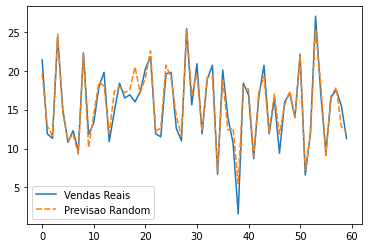

In [31]:
tabela_comparacao = pd.DataFrame()
tabela_comparacao['Vendas Reais'] = y_teste
tabela_comparacao['Previsao Random'] = teste_random
tabela_comparacao = tabela_comparacao.reset_index(drop=True)

display(tabela_comparacao)
sns.lineplot(data=tabela_comparacao)
plt.show()




#### Qual a importância de cada variável para as vendas?

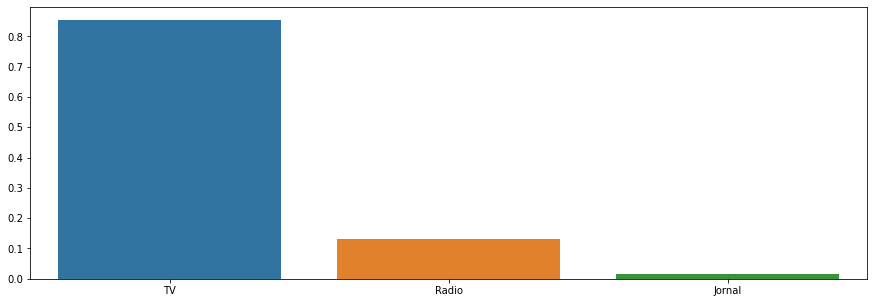

In [35]:
plt.figure(figsize=(15,5))
sns.barplot(x=x_treino.columns, y=randomforest.feature_importances_)
plt.show()

#### Será que estamos investindo certo?

In [38]:
print(tabela[['Radio', 'Jornal']].sum())

Radio     4652.8
Jornal    6110.8
dtype: float64
